## Importing Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
%matplotlib inline


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2022
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. COMPACT
- **ENGINE SIZE** e.g. 2.4
- **CYLINDERS** e.g 4
- **TRANSMISSION** e.g. AM8
- **FUEL TYPE** e.g. X
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 7
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 8.6
- **FUEL CONSUMPTION COMB (mpg)** e.g. 33
- **CO2 EMISSIONS (g/km)** e.g. 200   --> low --> 0
- **CO2 RATING** e.g. 6
- **SMOG RATING** e.g. 3


<h2 id="reading_data">Reading the data</h2>

In [24]:
df = pd.read_csv('MY2022_Fuel_ConsumptionCo2.csv')

# take a look at the dataset
df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,MDX Type S,SUV: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5
3,2022,Acura,NSX,Two-seater,3.5,6,AM9,Z,11.1,10.8,11.0,26,256,5,3
4,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6


In [25]:
# summarize the data
df.describe()

,MODEL_YEAR,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2_EMISSIONS,CO2_RATING,SMOG_RATING
count,976.0,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000,976.000000
mean,2022.0,3.201742,5.691598,12.561373,9.413217,11.144672,27.112705,260.439549,4.512295,4.965164
std,0.0,1.364918,1.935411,3.449886,2.305756,2.882519,7.639681,64.694076,1.473824,1.676631
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.300000,7.700000,9.100000,22.000000,214.000000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.300000,9.200000,10.900000,26.000000,258.000000,4.000000,5.000000
75%,2022.0,4.000000,6.000000,14.700000,10.700000,13.000000,31.000000,302.250000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


Lets select some features that we want to use for regression.

In [26]:
cdf = df[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2_EMISSIONS']]
cdf.head(9)

,ENGINE_SIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2_EMISSIONS
0,2.4,4,9.9,7.0,8.6,200
1,3.5,6,12.6,9.4,11.2,263
2,3.0,6,13.8,11.2,12.4,291
3,3.5,6,11.1,10.8,11.0,256
4,2.0,4,11.0,8.6,9.9,232
5,2.0,4,11.3,9.1,10.3,242
6,2.0,4,11.2,8.0,9.8,230
7,2.0,4,11.3,8.1,9.8,231
8,3.0,6,12.3,9.4,11.0,256


### Scatterplot Matrix:
This matrix allows you to visualize relationships between pairs of variables and can give you a 
quick overview of potential correlations

In [27]:
# Assuming df is your dataframe with the specified variables
#sns.pairplot(df[['ENGINE_SIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2_EMISSIONS']])
#plt.show()

### Correlation Heatmap
Visualizing the correlation matrix can help you understand the linear relationships between variables

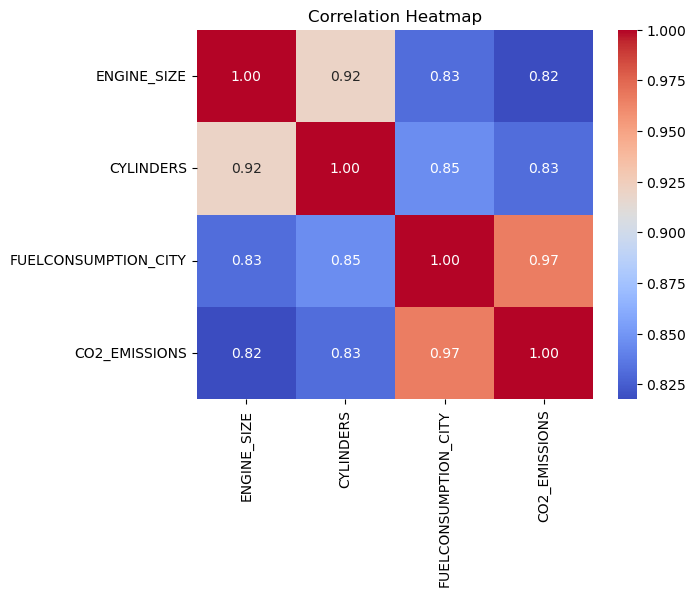

In [28]:
corr_matrix = df[['ENGINE_SIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'CO2_EMISSIONS']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Histogram
we can plot each of these separately features:

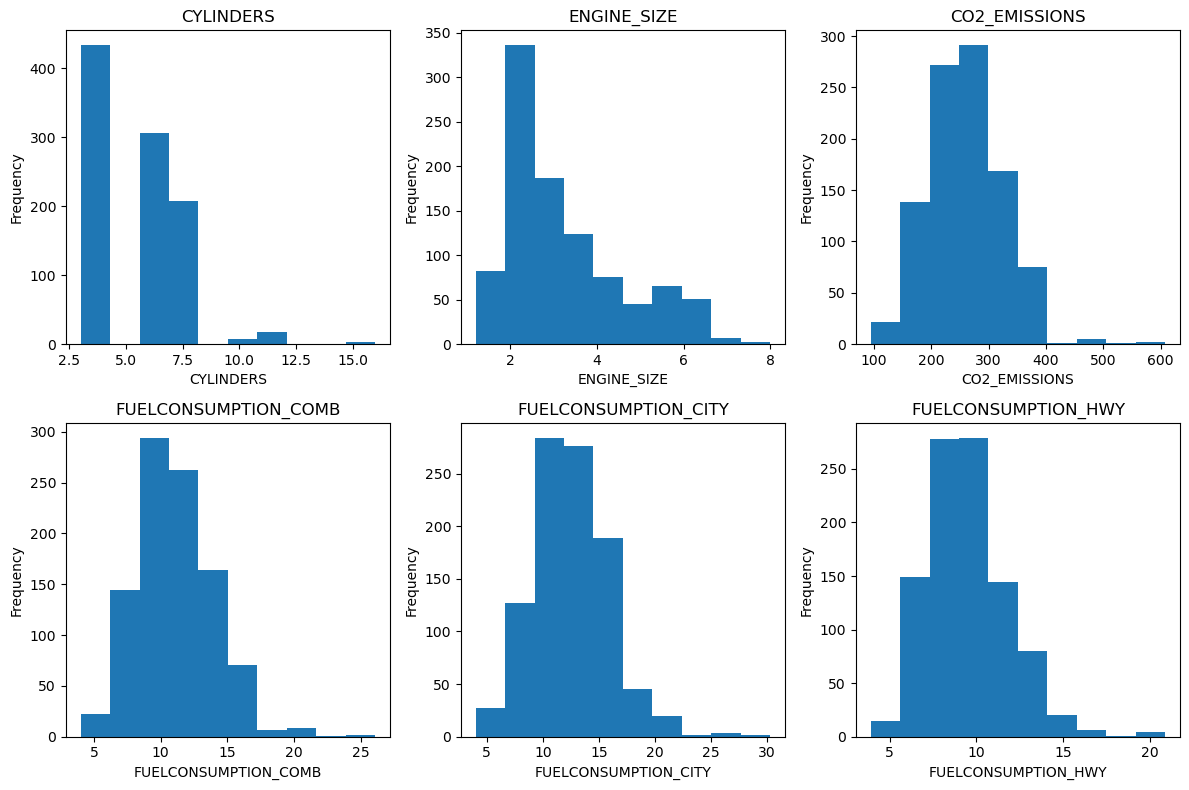

In [29]:
import matplotlib.pyplot as plt

# Select the columns for the histogram
viz = cdf[['CYLINDERS', 'ENGINE_SIZE', 'CO2_EMISSIONS', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]

# Create subplots with a specified layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8),)

# Flatten the axes for easier indexing
axes = axes.flatten()

# Plot each histogram on a separate subplot
for i, col in enumerate(viz.columns):
    viz[col].plot(kind='hist', ax=axes[i], title=col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

    
#plt.grid(True)
# Adjust layout

plt.tight_layout()

# Show the plot
plt.show()


Lets plot Emission values with respect to Engine size:

In [30]:
# plt.scatter(cdf.ENGINE_SIZE, cdf.CO2_EMISSIONS,  color='blue')
# plt.xlabel("ENGINE SIZE")
# plt.ylabel("CO2 EMISSIONS")
# plt.show()

### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.



In [31]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
#train and test are Dfs

### Train data distribution

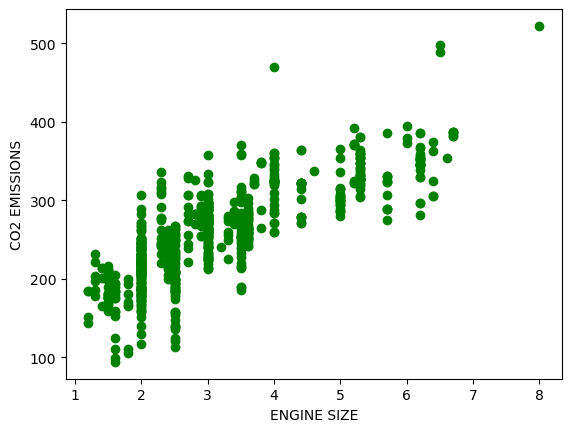

In [32]:
plt.scatter(train.ENGINE_SIZE, train.CO2_EMISSIONS,  color='green')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSIONS")
plt.show()

<h2 id="support_vector_regression_model">Support Vector Regression Model</h2>


SVR focuses on capturing the essential patterns in the data by identifying a hyperplane that maintains a balance between fitting the training points and allowing a defined level of deviation, known as the epsilon-insensitive tube.

In [33]:
from sklearn.svm import SVR
import numpy as np

# Initialize SVR model
svr_model = SVR(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)

train_x = np.asanyarray(train[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2_EMISSIONS']])
print(train_x)

# Train the model
svr_model.fit(train_x, train_y)

# The coefficients
print('Intercept: ', svr_model.intercept_)
print('Coefficients: ', svr_model.coef_)




[[ 2.4  4.   9.9  7.   8.6]
 [ 3.5  6.  12.6  9.4 11.2]
 [ 3.   6.  13.8 11.2 12.4]
 ...
 [ 2.   4.  11.   8.7  9.9]
 [ 2.   4.  11.5  8.4 10.1]
 [ 2.   4.  12.4  8.9 10.8]]


C:\Users\wAHAB\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept:  [0.7299204]
Coefficients:  [[ 0.56708209 -0.25015364  7.7726665   6.775266    8.83774925]]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.


<h2 id="prediction">Prediction</h2>

In [34]:
from sklearn.metrics import r2_score

pred_y= svr_model.predict(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2_EMISSIONS']])

mse = np.mean((pred_y - test_y) ** 2)

# Calculate the range of CO2 emissions
co2_emissions_range = df['CO2_EMISSIONS'].max() - df['CO2_EMISSIONS'].min()
print(co2_emissions_range)
# Normalize MSE
normalized_mse = mse / co2_emissions_range
print("Residual sum of squares (MSE): %.2f"% np.mean((pred_y - test_y) ** 2))
print(f'Normalized MSE: {normalized_mse}')
# Assuming you have already calculated MSE


print("R2-score: %.2f" % r2_score(pred_y , test_y) )

print("Mean absolute error: %.2f" % np.mean(np.absolute(pred_y - test_y)))


# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % svr_model.score(test_x, test_y))


514
Residual sum of squares (MSE): 11416.06
Normalized MSE: 22.210234972963928
R2-score: 0.97
Mean absolute error: 81.46
Explained Variance score: 0.97


C:\Users\wAHAB\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [35]:
r2 = r2_score(pred_y, test_y)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print('Accuracy (R-squared): {:.2f}%'.format(accuracy_percentage))


Accuracy (R-squared): 97.30%


In [36]:
co2_emissions_range = df['CO2_EMISSIONS'].max() - df['CO2_EMISSIONS'].min()
print(co2_emissions_range)

514


In [37]:
# # Generate a range of values for ENGINE_SIZE, CYLINDERS, and FUELCONSUMPTION_COMB
# # This will be used for creating a smoother curve
# engine_size_range = np.linspace(min(df['ENGINE_SIZE']), max(df['ENGINE_SIZE']), 100).reshape(-1, 1)
# cylinders_range = np.linspace(min(df['CYLINDERS']), max(df['CYLINDERS']), 100).reshape(-1, 1)
# fuel_consumption_range = np.linspace(min(df['FUELCONSUMPTION_COMB']), max(df['FUELCONSUMPTION_COMB']), 100).reshape(-1, 1)

# # Create a grid of values for prediction
# grid_values = np.column_stack((engine_size_range, cylinders_range, fuel_consumption_range))

# # Make predictions on the grid
# predicted_values = svr_model.predict(grid_values)

# # Plot the actual versus predicted values
# plt.figure(figsize=(10, 6))

# # Scatter plot of actual values
# plt.scatter(test_x[:, 0], test_y, color='blue', label='Actual Values')

# # Line plot of predicted values
# plt.plot(grid_values[:, 0], predicted_values, color='red', linewidth=2, label='SVR Prediction')

# plt.title('SVR Results - Actual vs Predicted')
# plt.xlabel('ENGINE_SIZE')
# plt.ylabel('CO2_EMISSIONS')
# plt.legend()
# plt.show()


NameError: name 'grid_values' is not defined

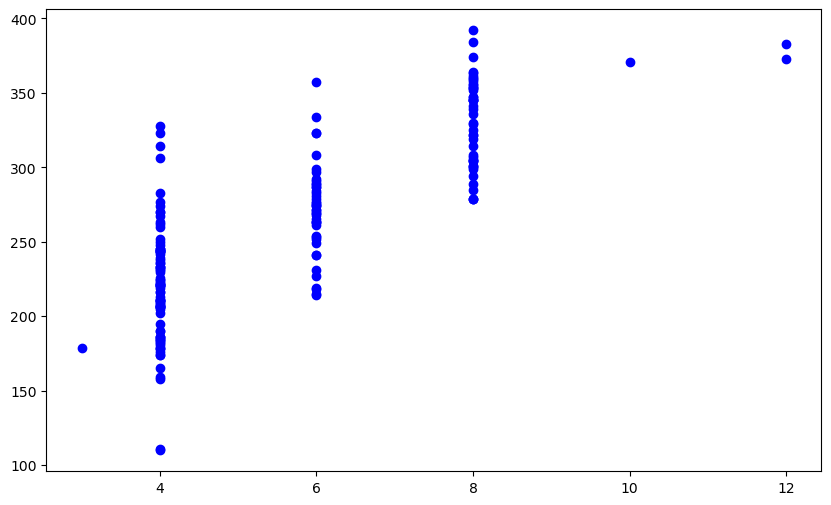

In [16]:
# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
# Scatter plot of actual values
plt.scatter(test_x[:, 1], test_y, color='blue', label='Actual Values')

# Line plot of predicted values
plt.plot(grid_values[:, 1], predicted_values, color='red', linewidth=2, label='SVR Prediction')

plt.title('SVR Results - Actual vs Predicted')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2_EMISSIONS')
plt.legend()
plt.show()

In [ ]:
# Plot the actual versus predicted values
plt.figure(figsize=(10, 6))
# Scatter plot of actual values
plt.scatter(test_x[:, 2], test_y, color='blue', label='Actual Values')

# Line plot of predicted values
plt.plot(grid_values[:, 2], predicted_values, color='red', linewidth=2, label='SVR Prediction')

plt.title('SVR Results - Actual vs Predicted')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2_EMISSIONS')
plt.legend()
plt.show()

__Explained Variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

<h2 id="2nd Iteration">2nd Iteration</h2>

Trying a multiple linear regression with the same dataset but this time using __FUEL CONSUMPTION in CITY__ instead of FUELCONSUMPTION_COMB to check if it has better accuracy..

In [18]:
x1 = np.asanyarray(train[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y1 = np.asanyarray(train[['CO2_EMISSIONS']])
svr_model = SVR(kernel='linear')
svr_model.fit (x1, y1)

y1_pred= svr_model.predict(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
x1 = np.asanyarray(test[['ENGINE_SIZE','CYLINDERS','FUELCONSUMPTION_CITY']])
y1 = np.asanyarray(test[['CO2_EMISSIONS']])


print("Residual sum of squares (MSE): %.2f"% np.mean((y1_pred - y1) ** 2))
print("R2-score: %.2f" % r2_score(y1_pred , y1) )

print("Mean absolute error: %.2f" % np.mean(np.absolute(y1_pred - y1)))

#print("R2-score: %.2f" % r2_score(pred_y , test_y) )

# Explained variance score: 1 is perfect prediction
print('Explained Variance score: %.2f' % svr_model.score(x1, y1))

C:\Users\wAHAB\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\wAHAB\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


Residual sum of squares (MSE): 7517.20
R2-score: 0.92
Mean absolute error: 69.06
Explained Variance score: 0.91


In [19]:
r2 = r2_score(y1_pred, y1)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print('Accuracy (R-squared): {:.2f}%'.format(accuracy_percentage))


Accuracy (R-squared): 92.31%


In [44]:
#Saving the model

import joblib

# Assuming svr_model is your trained SVR model

# Save the model to a file
joblib.dump(svr_model, 'svrr_model.pkl')


['svrr_model.pkl']

In [40]:
# Load the model from the file
loaded_model = joblib.load('svrr_model.pkl')

# Create a dictionary with the values you want to predict
data_to_predict = {
    'ENGINE_SIZE': [4],
    'CYLINDERS': [6],
    'FUELCONSUMPTION_CITY': [17],  # Add a comma here
    'FUELCONSUMPTION_HWY': [13.1],
    'FUELCONSUMPTION_COMB': [15.2]
}

# Create a DataFrame from the dictionary
data_to_predict_df = pd.DataFrame(data_to_predict)

# Predict the target value for the given input features using the loaded model
pred_y = loaded_model.predict(data_to_predict_df)

# Print the predicted value
print(pred_y)


[356.55868741]


C:\Users\wAHAB\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
